In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("retail_sales_dataset.csv")

# Display first 5 rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.shape


(1000, 9)

In [5]:
df.info

<bound method DataFrame.info of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount

In [6]:
df.describe

<bound method NDFrame.describe of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amou

In [7]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
# Fill numerical missing values with mean
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13640\1803141176.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [10]:
df.drop_duplicates(inplace=True)


In [11]:
df['Date'] = pd.to_datetime(df['Date'])


In [12]:
# Create Month & Year columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [16]:
df.columns


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month', 'Year'],
      dtype='object')

In [17]:
print(df.columns.tolist())


['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount', 'Month', 'Year']


In [18]:
mean_sales = df['Total Amount'].mean()
median_sales = df['Total Amount'].median()
std_sales = df['Total Amount'].std()

print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Standard Deviation:", std_sales)


Mean Sales: 456.0
Median Sales: 135.0
Standard Deviation: 559.997631555123


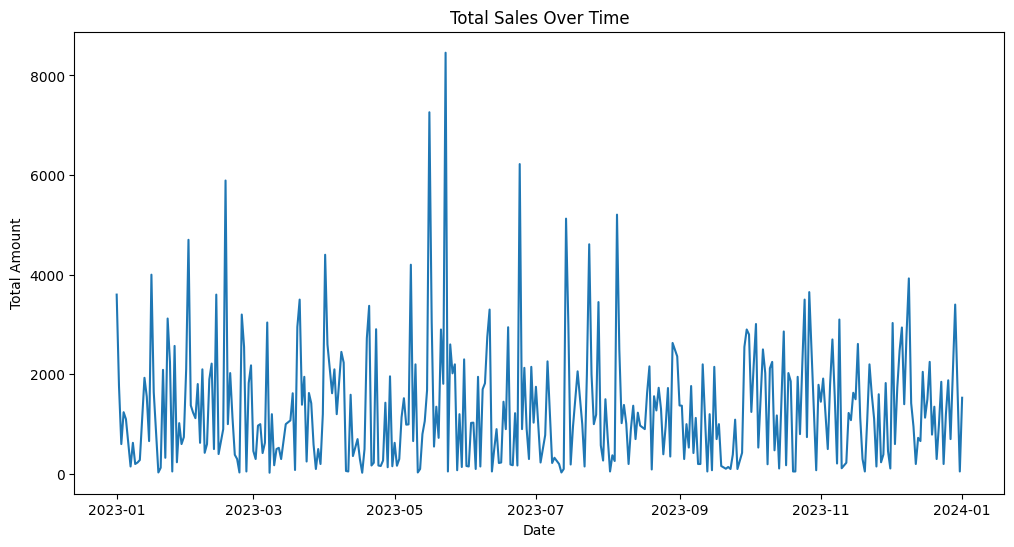

In [20]:
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sales over time
sales_over_time = df.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(12,6))
plt.plot(sales_over_time)
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.show()

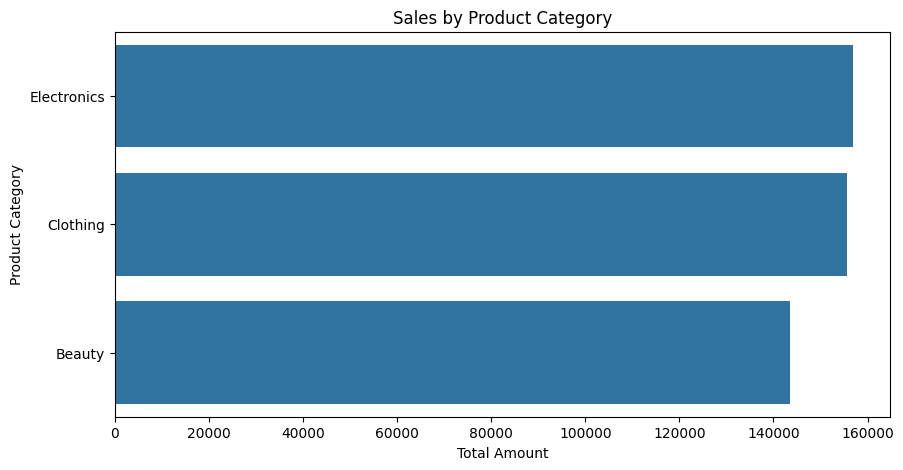

In [21]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title("Sales by Product Category")
plt.xlabel("Total Amount")
plt.ylabel("Product Category")
plt.show()


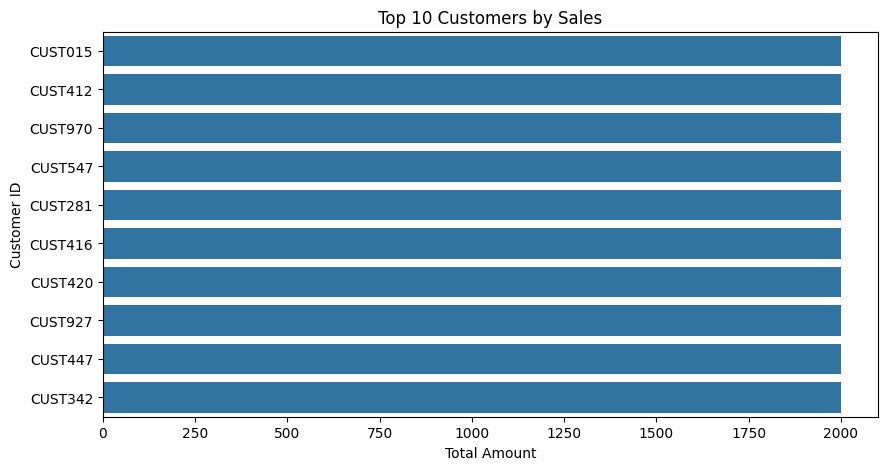

In [22]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Amount")
plt.ylabel("Customer ID")
plt.show()


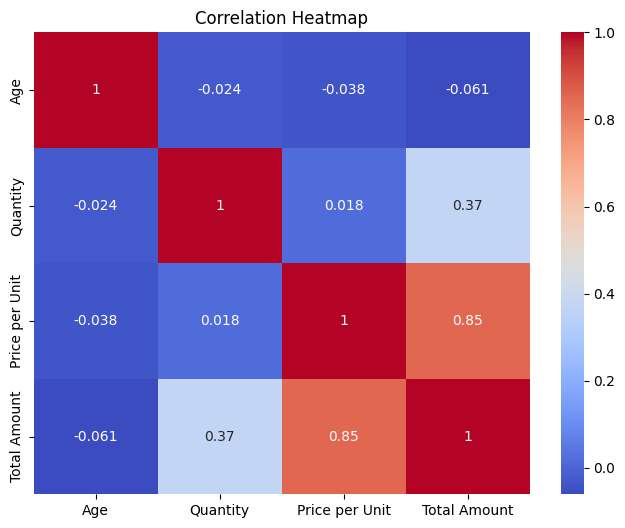

In [23]:
num_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [24]:
df.to_csv("cleaned_retail_sales.csv", index=False)